In [19]:
! pip install seaborn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import display
import seaborn as sns


# Importation des données

In [2]:
# Charger les données depuis le fichier CSV
df = pd.read_csv('../Donnees/trip_subtrip.csv', delimiter=';')

# Nombre d'utilisateurs par semaine

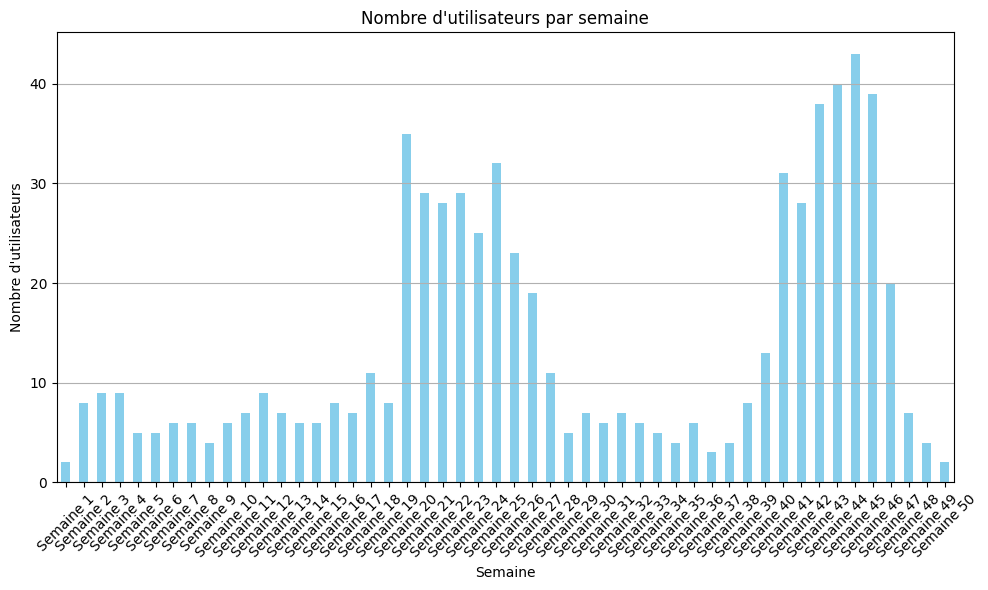

In [3]:
# Convertir les colonnes de temps en types datetime
df['start_time_x'] = pd.to_datetime(df['start_time_x'])
df['end_time_x'] = pd.to_datetime(df['end_time_x'])

# Regrouper par semaine et compter le nombre d'utilisateurs uniques par semaine
users_per_week = df.groupby(pd.Grouper(key='start_time_x', freq='W'))['id_utente_x'].nunique()

# Afficher le nombre d'utilisateurs par semaine
#print(users_per_week)

# Renommer les index avec des noms de semaine
week_names = ['Semaine {}'.format(i) for i in range(1, len(users_per_week) + 1)]
users_per_week.index = week_names

# Tracer le graphique
plt.figure(figsize=(10, 6))
users_per_week.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'utilisateurs par semaine')
plt.xlabel('Semaine')
plt.ylabel('Nombre d\'utilisateurs')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Nombre de colaries brûlées au total

In [4]:
# Calculer le nombre total de calories brûlées
total_calories_burned = df['calories_x'].sum()

print("Nombre total de calories brûlées:", total_calories_burned, "kCal")

Nombre total de calories brûlées: 988121 kCal


# Moyenne calories dépensées par mode de transport

In [5]:
# Calculer la moyenne des calories dépensées par mode de transport
mean_calories_by_transport = df.groupby('subtrip_type')['calories_x'].mean()

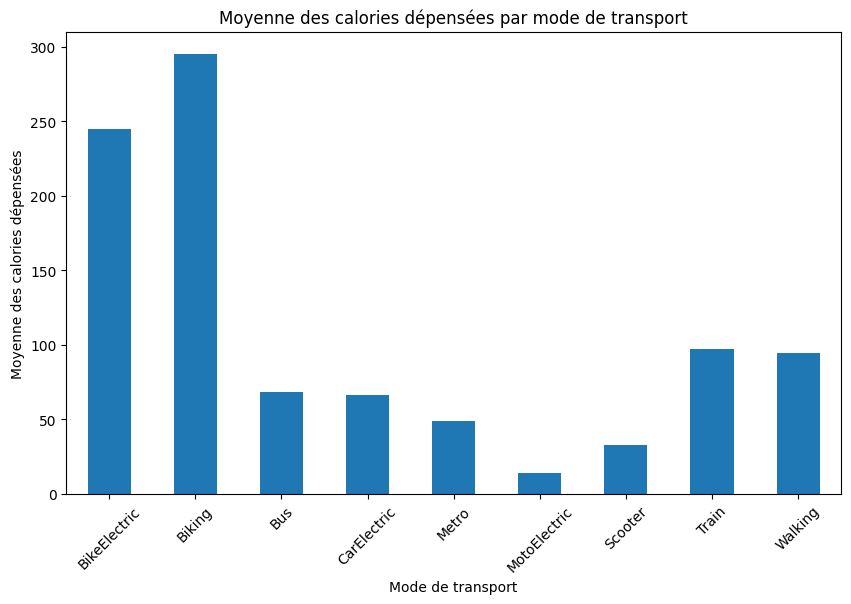

In [6]:
# Tracer un diagramme à barres pour représenter les moyennes des calories par mode de transport
mean_calories_by_transport.plot(kind='bar', figsize=(10, 6))
plt.title('Moyenne des calories dépensées par mode de transport')
plt.xlabel('Mode de transport')
plt.ylabel('Moyenne des calories dépensées')
plt.xticks(rotation=45)
plt.show()

# Moyenne du temps passé par mode de transport

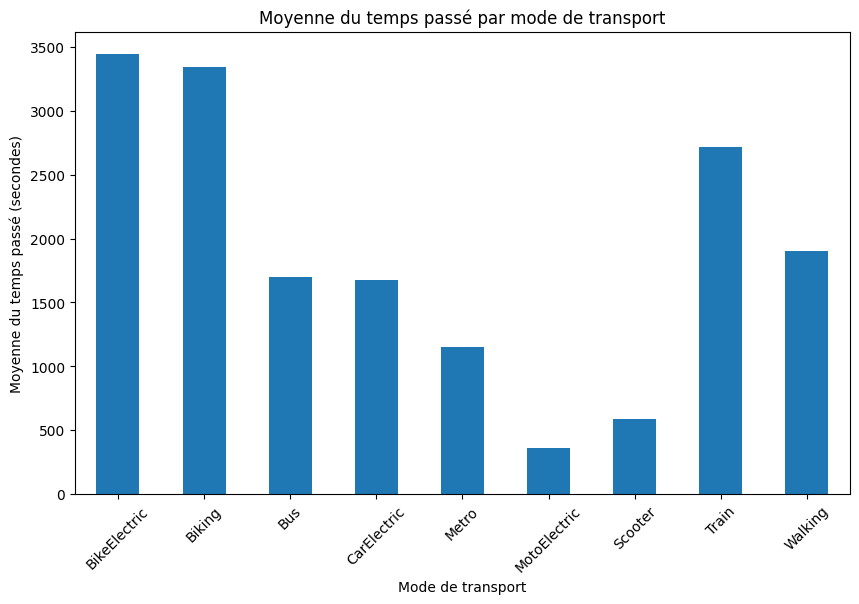

In [7]:
# Calculer la moyenne du temps passé par mode de transport
df['duration_x'] = pd.to_timedelta(df['duration_x'])
mean_duration_by_transport = df.groupby('subtrip_type')['duration_x'].mean()

# Tracer un diagramme à barres pour représenter les moyennes de temps par mode de transport
mean_duration_by_transport.dt.total_seconds().plot(kind='bar', figsize=(10, 6))
plt.title('Moyenne du temps passé par mode de transport')
plt.xlabel('Mode de transport')
plt.ylabel('Moyenne du temps passé (secondes)')
plt.xticks(rotation=45)
plt.show()

# Somme du temps passé par mode de transport

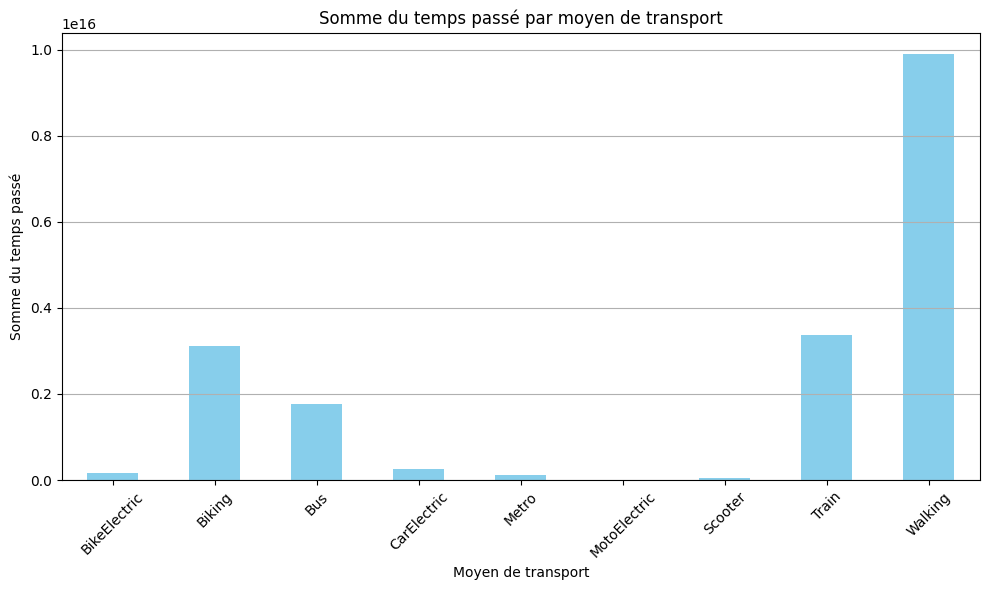

In [8]:
# Calculer la somme du temps passé par moyen de transport
sum_duration_by_transport = df.groupby('subtrip_type')['duration_x'].sum()

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
sum_duration_by_transport.plot(kind='bar', color='skyblue')
plt.title('Somme du temps passé par moyen de transport')
plt.xlabel('Moyen de transport')
plt.ylabel('Somme du temps passé')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribution du temps de trajet par moyen de transport

In [9]:
# Calculer la distance en kilomètres (supposant que la distance est en kilomètres)
df['distance_km'] = df['distance_x']

# Récupérer les moyens de transport uniques
modes_of_transport = df['subtrip_type'].unique()



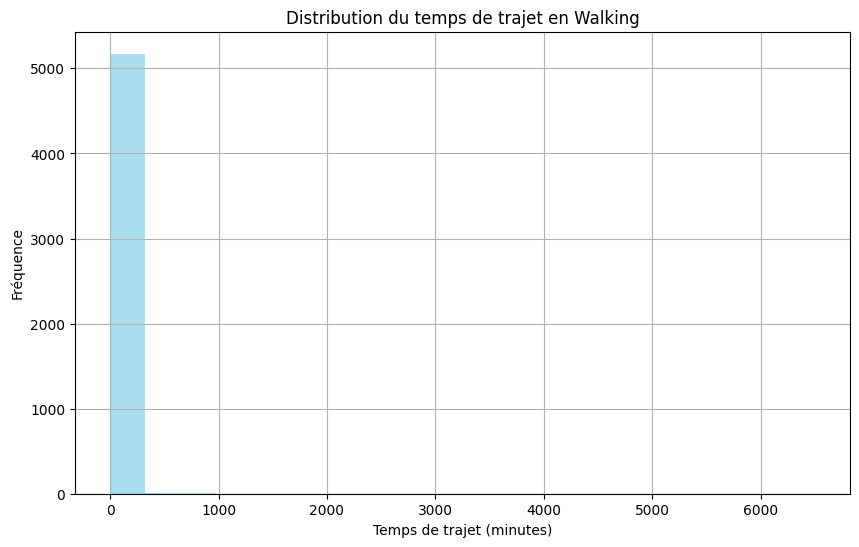

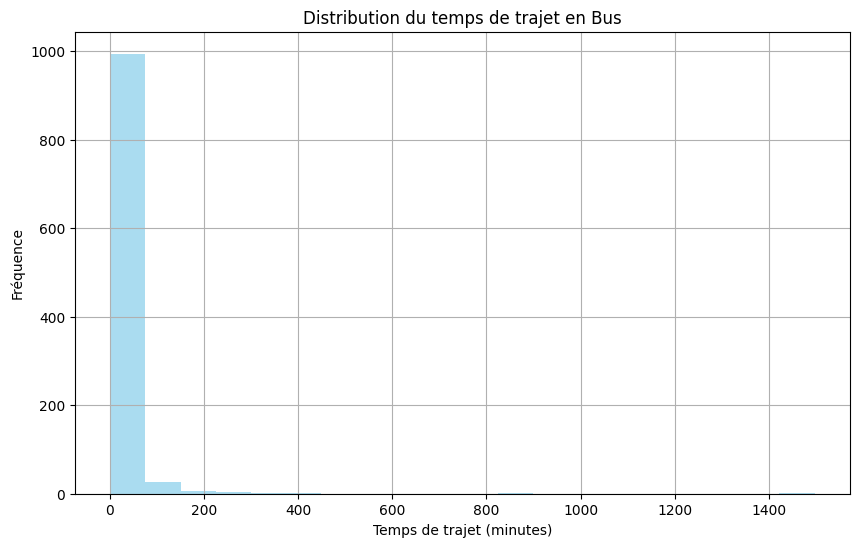

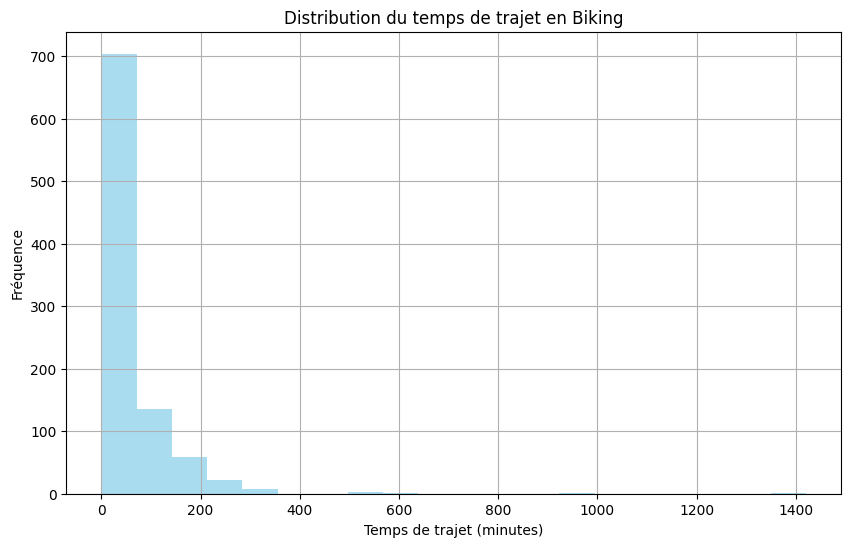

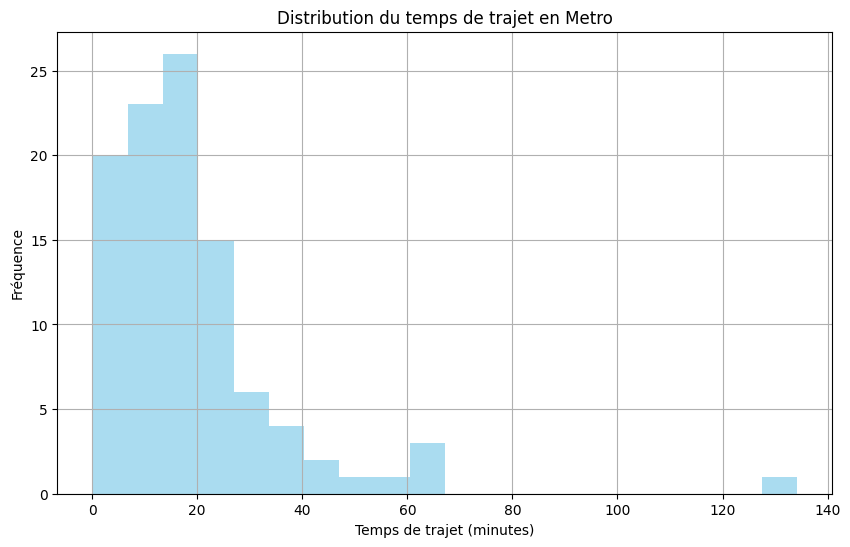

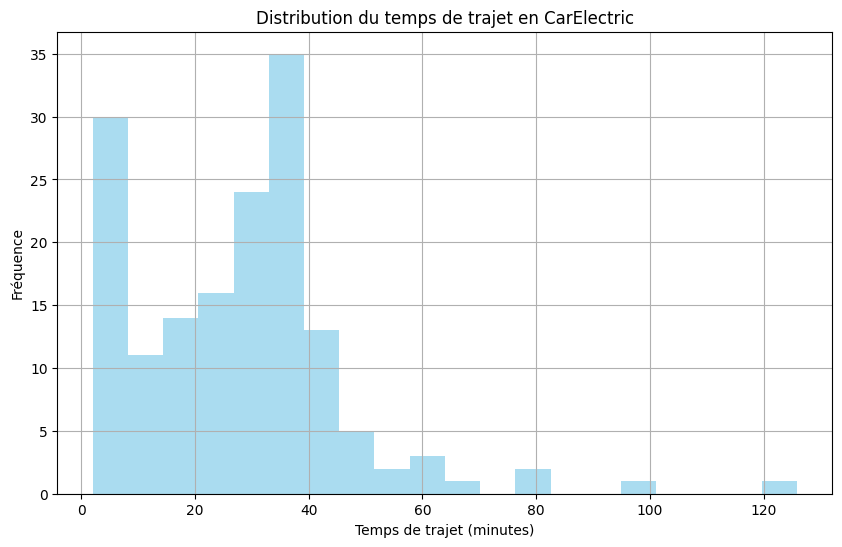

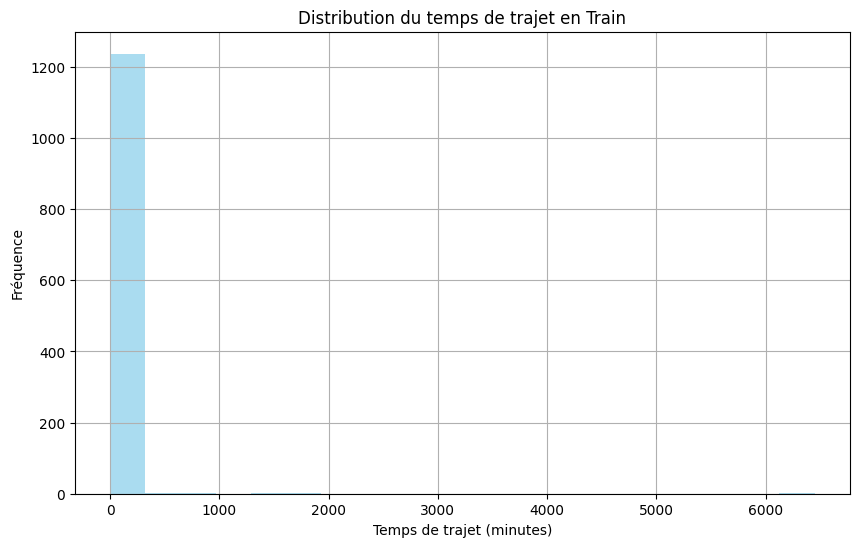

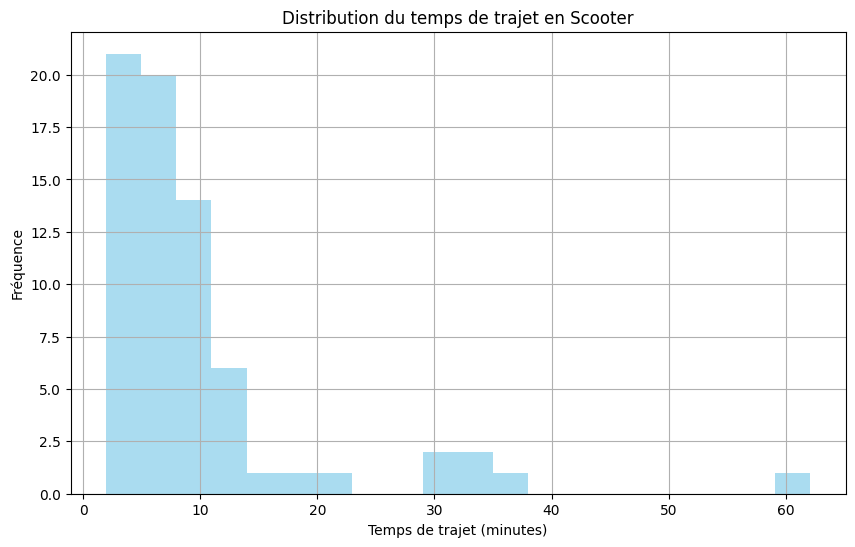

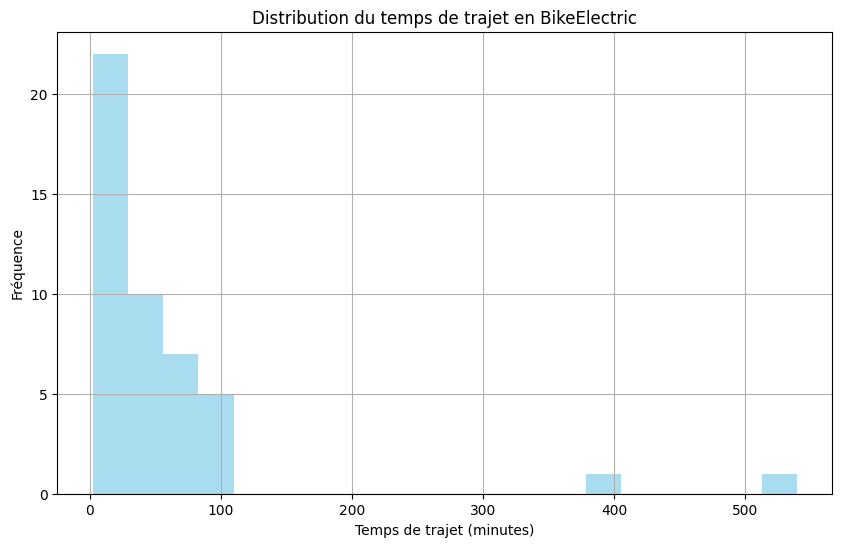

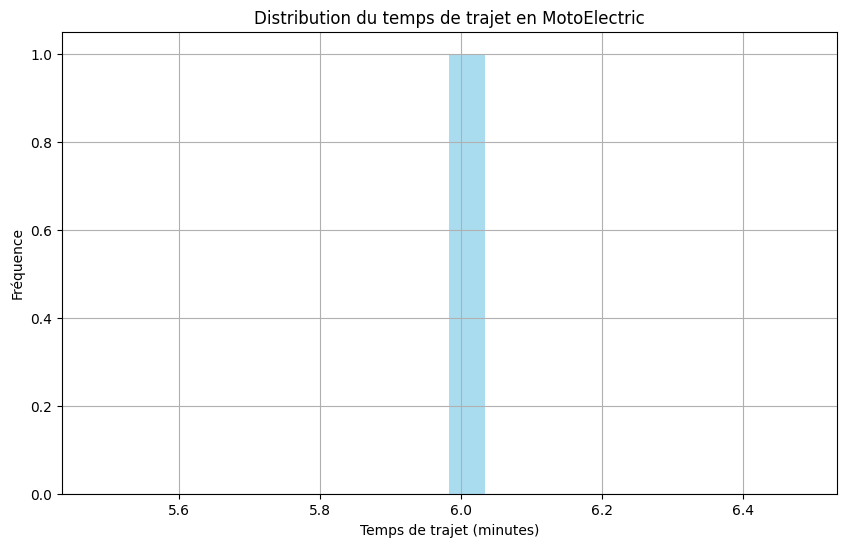

In [10]:
# Filtrer les données et tracer l'histogramme pour chaque moyen de transport
for mode in modes_of_transport:
    df_mode = df[df['subtrip_type'] == mode]
    
    plt.figure(figsize=(10, 6))
    plt.hist(df_mode['duration_x'].dt.total_seconds() / 60, bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution du temps de trajet en {mode}')
    plt.xlabel('Temps de trajet (minutes)')
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

In [11]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import gridplot

In [12]:
# Créer une figure Bokeh pour chaque moyen de transport
plots = []
for mode in modes_of_transport:
    df_mode = df[df['subtrip_type'] == mode]
    
    p = figure(title=f'Distribution du temps de trajet en {mode}',
               x_axis_label='Temps de trajet (minutes)',
               y_axis_label='Fréquence',
               width=600,
               height=400)
    
    hist, edges = np.histogram(df_mode['duration_x'].dt.total_seconds() / 60, bins=20)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="skyblue", line_color="white", alpha=0.7)
    
    plots.append(p)

# Afficher les graphiques dans le notebook
output_notebook()
show(gridplot(plots, ncols=2))

Loading BokehJS ...

# Boxplot

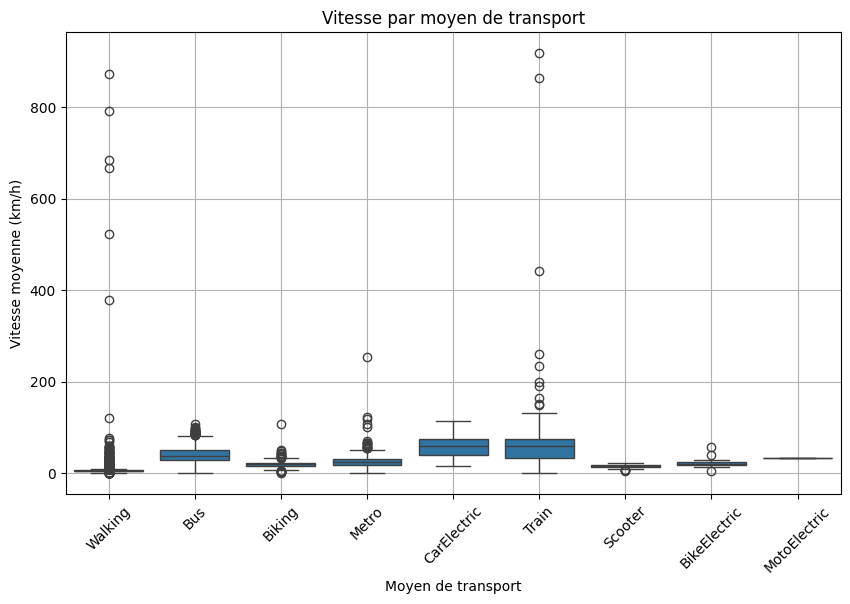

In [22]:
# Convertir la colonne duration_x en minutes (si elle n'est pas déjà en minutes)
df['duration_minutes'] = df['duration_x'].dt.total_seconds() / 60

# Créer un boxplot des vitesses par moyen de transport
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subtrip_type', y='avg_speed')
plt.title('Vitesse par moyen de transport')
plt.xlabel('Moyen de transport')
plt.ylabel('Vitesse moyenne (km/h)')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(True)
plt.show()